In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('crimedata.csv')
df.columns

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=146)

In [97]:
feature_names = ["PctKids2Par", "PctKidsBornNeverMar", "PctFam2Par"]
updated_df = df.dropna(subset=['ViolentCrimesPerPop'])

X = updated_df[feature_names]
y = updated_df.ViolentCrimesPerPop

In [98]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [99]:
# Set random seed
tf.random.set_seed(42)

dnn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
dnn_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = dnn_model.fit(X_train, y_train, epochs=500, verbose=0)

In [100]:
dnn_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 273.7249 - mae: 273.7249


[273.7248840332031, 273.7248840332031]

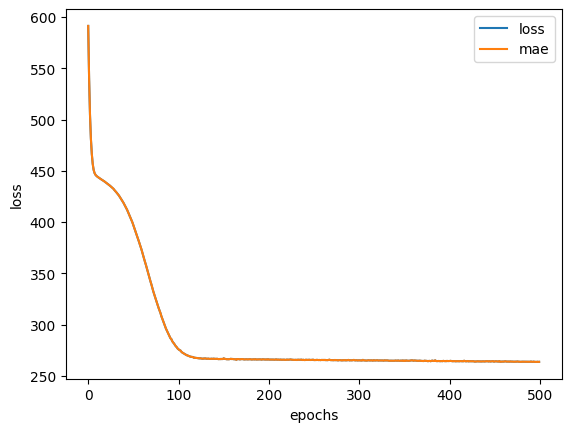

In [101]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
